## Reading Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import csv
from matplotlib import pyplot as plt
import nltk
import spacy
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
data = pd.read_csv("Clean_TripAdvisor_English_Reviews_Seoul_Hotels.csv")
print(data.shape)
data.head()

(50175, 7)


,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [3]:
data.isna().sum()

Hotel                     0
reviewer_name             0
country                9280
rating                    0
date_of_stay             90
date_review_written       0
clean_reviews             0
dtype: int64

# SENTIMENT ANALYSIS using VADER

From Documentation: https://vadersentiment.readthedocs.io/en/latest/

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:negative, neutral,positive, and compound(computed by normalizing the scores)

Vader sentiment not only tells if the statement is positive or negative but also the intensity of emotion.


### About the Scoring

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.5

neutral sentiment: (compound score > -0.5) and (compound score < 0.5)

negative sentiment: compound score <= -0.5

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1… or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [5]:
# Defining functions to get sentiments for each review in our dataset
# Code Help: https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'compound'))
    return df

In [6]:
sentiment_scores = get_sentiment_scores(data,"clean_reviews")

In [7]:
sentiment_scores.sample(5)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score
29982,Lotte_Hotel_Seoul,kenji98,New York,5.0,April 2008,Jun 2010,THE BEST They can not get cleaner...I actually...,0.242,0.000,0.758,0.9711
953,Amanti_Hotel_Seoul,Passport57020122791,China,4.0,November 2018,Nov 2018,Good location!Good choice! There should be a s...,0.094,0.000,0.906,0.5550
14985,Hotel_Manu,Northstar31200414085,Hawaii,5.0,November 2018,Nov 2018,I was very satisfied with this hotel The staff...,0.074,0.017,0.910,0.9334
18969,Hotel_Skypark_Myeongdong_3,myrtlebeach73,New York,4.0,November 2014,Oct 2015,"Excellent Location Nothing fancy, just great l...",0.177,0.039,0.785,0.9151
45884,THE_PLAZA_Seoul_Autograph_Collection,Jat73,New Jersey,5.0,January 2019,Feb 2019,"Great location, excellent hotel. Hotel is righ...",0.478,0.000,0.522,0.9824


In [8]:
# function to analyse

def vader_classifier(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
# Applying the classifier to our data

sentiment_scores["sentiment"] = sentiment_scores["clean_reviews Compound Sentiment Score"].apply(vader_classifier)

In [10]:
sentiment_scores.sample(5)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment
266,Aloft_Seoul_Gangnam,Richard H,United Kingdom,4.0,June 2015,Jul 2015,Fun and funky Great location and just what a m...,0.387,0.023,0.590,0.9689,Positive
14888,Hotel_Loft,jessicacca,China,5.0,October 2015,Nov 2015,An affordable but luxurious hotel Prior to our...,0.233,0.036,0.732,0.9947,Positive
41425,Sejong_Hotel,pbpk,Canada,1.0,February 2013,Feb 2013,"Great location, poor quality, mediocre service...",0.142,0.074,0.784,0.7717,Positive
36659,Oakwood_Premier_Coex_Center,Rizal H,Malaysia,4.0,October 2014,Oct 2014,Pretty average The reason we stayed at this ho...,0.155,0.037,0.808,0.9426,Positive
27207,Lotte_City_Hotel_Gimpo_Airport,juhee2015,South Korea,5.0,October 2015,Oct 2015,Kind reception and clean room I stayed 1 night...,0.361,0.000,0.639,0.9708,Positive


### Classified Reviews

In [11]:
# Function to print top scoring reviews for all the different types of sentiment and check if they make sense

def get_top_n_reviews(dataframe,column,num_rows):
    for index,row in dataframe.nlargest(num_rows,column).iterrows():
        print(f"Score: {row[column]}")
        print(f"Review: {row[6]}")
        print(" ")

In [12]:
get_top_n_reviews(sentiment_scores,"clean_reviews Positive Sentiment Score", 4)

Score: 0.741
Review: FANTASTIC the best place to stay in korea!!!!! Great Location, great room, great staff!!!! Amazing!!!!
 
Score: 0.715
Review: was perfect for me great!!! friendly staffs, fabulous lobby, yummy kitchen, professional service and nice location.
 
Score: 0.713
Review: Great location, outstanding service fabulous hotel, amazing breakfast buffet, well appointed rooms
 
Score: 0.699
Review: Amazing Stay Excellent service. Everything neat and clean. Beautiful Hotel. Friendly people. Highly Recommend. Center of the City. Clean. Neat. Beautiful. Accessible. Amazing Service. Near Shopping Malls. Good Location
 


In [13]:
get_top_n_reviews(sentiment_scores,"clean_reviews Negative Sentiment Score", 4)

Score: 0.445
Review: Bad Attitude Bad attitude, Bad behavior And Never Friendly of hotel staff. very disappointing with the hotel management and the staff. They never be friendly and talk rudely with the the hotel guests and customers.
 
Score: 0.425
Review: Rude, racist, unprofessional Rude, racist, unprofessional. And the female workers tried to sell themselves to me. It s a shame. The connected casino at the basement is also a disgrace to the entire place. It looks more like an underground illegal gambling den with equally low class dealers and it is very dirty with workers not even speaking English. It s appalling.
 
Score: 0.386
Review: Very expensive and dirty Location is great, very close to insangdong and Myeongdong. Food everything, but the hotel room is extremely DIRTY! The toilet is disgusting. Smelly, dirty with insects flying. I will not recommend this hotel to anyone of you. Horrible.
 
Score: 0.385
Review: Extremely poor I don't understand how rating system works in Kore

In [14]:
get_top_n_reviews(sentiment_scores,"clean_reviews Neutral Sentiment Score", 4)

Score: 1.0
Review: Convenience Location with Reasonable Price My first hotel choice everytime when I visit Seoul! Near Hongik University station, which is one of the airport railway stations and at the same time quite a big interchange station. Very convenience to get to the hotel from the airport when you're dragging a big luggage case, and also convenience for you to travel around in Seoul.
 
Score: 1.0
Review: Location is not convenience I suggest hotel should offer shuttle bus to nearby subway or sightseeing points.As I always need to take taxi as location is not convenience and the room rate is expensive when compare with other 5 stars hotel
 
Score: 1.0
Review: Average Price was high, staff at the front desk didnot speak much English, did not know what was the expectation from a business person.the prices were really very high. I still do not know how much points I got for my 5 days stay
 
Score: 1.0
Review: Locations location location A 4 star hotel located at the center of Seou

#### We can see above that the classifications are pretty good. So we will now proceed with further analysis of the data.

In [15]:
#counting the number of positive, negative and neutral reviews

vader_counts = sentiment_scores['sentiment'].value_counts()
vader_counts

Positive    45978
Neutral      2504
Negative     1693
Name: sentiment, dtype: int64

In [16]:
# Counting the length of the reviews and visualization

# Wordcounts for reviews
sentiment_scores["word_count"] = sentiment_scores["clean_reviews"].apply(lambda x: len(x.split()))

#Scaled wordcounts for better visualization

wc_mean = sentiment_scores["word_count"].mean()
wc_deviation = sentiment_scores["word_count"].std()

sentiment_scores["word_count_scaled"] = sentiment_scores["word_count"].apply(lambda x: (x-wc_mean)/wc_deviation)

print(f"Average Word Count = {wc_mean}")

sentiment_scores.sample(3)

Average Word Count = 126.9350274040857


,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled
5161,Courtyard_by_Marriott_Seoul_Times_Square,Leighsscreenname,Washington,3.0,December 2014,Dec 2014,Not typical Forget what you know about Marriot...,0.136,0.02,0.845,0.9286,Positive,139,0.100736
31646,Metro_Hotel,lovetto,Singapore,5.0,June 2012,Sep 2012,Wonderful stay in an excellent location! Me an...,0.110,0.00,0.890,0.9669,Positive,201,0.618401
9094,Fraser_Place_Central_Seoul,beagle7722,Singapore,5.0,November 2022,Nov 2022,A great holiday! My friends and family took up...,0.256,0.00,0.744,0.9895,Positive,124,-0.024506


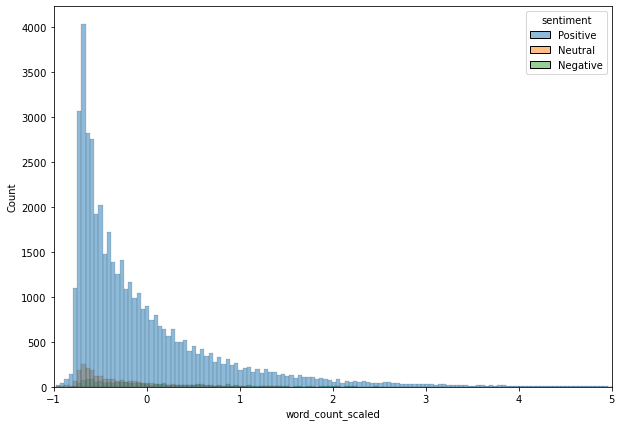

In [17]:
plt.figure(figsize=(10,7))
sns.histplot(data=sentiment_scores, x="word_count_scaled", hue="sentiment", alpha=0.5)

plt.xlim(-1,5)

plt.show()

#### Since the data has high positivity biasness, it is better to analyse the data separately ("Postive","Neutral","Negative") in further analysis.

## Preprocessing the Data for WordClouds and Further Analysis

In [19]:
nlp = spacy.load("en_core_web_lg")

def preprocess(text):
    
    #keeps only letters
    text = re.sub("[^A-Za-z]+", " ", text)
    
    #lowers the text and create spacy object
    doc = nlp(text.lower())
    
    #stopwords
    stop_words = stopwords.words('english')
    new_stopwords = ["hotel","everything","anything","nothing","thing","need",
                     "good","great","excellent","perfect","much","even","really","well",
                     "one","nice","definitely"]  
    stop_words = stop_words+new_stopwords
    stop_words
 
    
    processed_text = []
    
    for token in doc:
        #remove stopwords and keeps only adverbs, adjectives, nouns,and verbs
        if (token.text in stop_words) or (token.pos_ not in ["ADJ","ADV","NOUN","VERB"]):
            pass
        else:
            processed_text.append(token.lemma_)  
            
    return " ".join(processed_text)

In [20]:
text = sentiment_scores["clean_reviews"][3000]
text

'Very good business hotel Hotel with very good level of standards, ideal for business travel. As it is directly connected to a large shopping mall, no worries about forgotten items or lost luggage, and good variaty of places for dinner. Overall very solid price-quality ratio.'

In [21]:
preprocess(text)

'business level standard ideal business travel directly connect large shopping mall worry forget item lose luggage variaty place dinner overall solid price quality ratio'

In [43]:
# Cleaning the data
sentiment_scores["preprocessed_reviews"] = sentiment_scores["clean_reviews"].apply(preprocess)
sentiment_scores.sample(3)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews
47988,The_Westin_Josun_Seoul,Tripmomo,South Korea,5.0,January 2018,Jan 2018,Far better than expected There was someone's r...,0.238,0.054,0.708,0.9915,Positive,182,0.459762,far well expect review compare fourseason help...
3273,Conrad_Seoul,Glenn2869,California,5.0,May 2016,Jul 2016,Most beautiful Conrad This has to one of the m...,0.253,0.000,0.747,0.9785,Positive,82,-0.375182,beautiful conrad beautiful stay several time s...
1982,Bukchonmaru_Hanok_Guesthouse,chloegsr,Western Australia,5.0,December 2017,Jan 2018,"Loved it! Family of 4, booked a family room. w...",0.176,0.012,0.811,0.9904,Positive,193,0.551605,love family book family room bathroom room big...


In [25]:
data = pd.read_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv")
data.head()

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...,0.184,0.092,0.724,0.6543,Positive,48,-0.659063,love look location bad station comfortable bed...
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...,0.154,0.156,0.690,-0.2752,Neutral,51,-0.634015,bad experience ask provide set comfort refuse ...
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...,0.157,0.000,0.843,0.9001,Positive,81,-0.383532,chic design clean boutique conveniently locate...
3,9Brick_Hotel,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...,0.140,0.087,0.774,0.9451,Positive,240,0.944029,location weak service standard let start like ...
4,9Brick_Hotel,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...,0.156,0.020,0.823,0.9778,Positive,170,0.359568,never well exceed expectation term efficient s...


In [22]:
# Word cloud of all the reviews

import matplotlib.pyplot as plt

from wordcloud import WordCloud

def plot_wordcloud(series,output_filename='wordcloud'):
    
    wordcloud = WordCloud(collocations = False,
                          background_color = "white",
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')
    
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,output_filename,fontsize = 60, ha='center')
    return plt.show()

In [23]:
#Function for the wordclouds by Positivity, Negativity, and Neutrality

def plot_wordcloud_top_n(df,num_reviews,score_column,data_column,output_filename):
    
    sliced_df = df.nlargest(num_reviews,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)

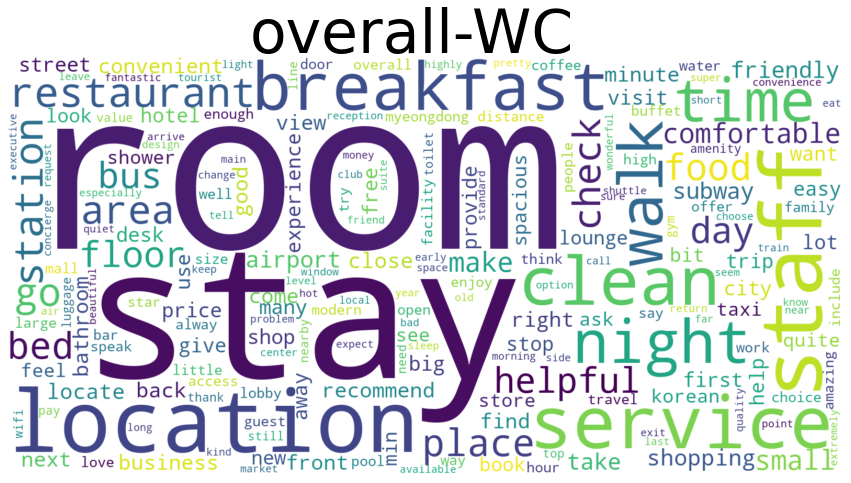

In [28]:
plot_wordcloud(data["preprocessed_reviews"],'overall-WC')

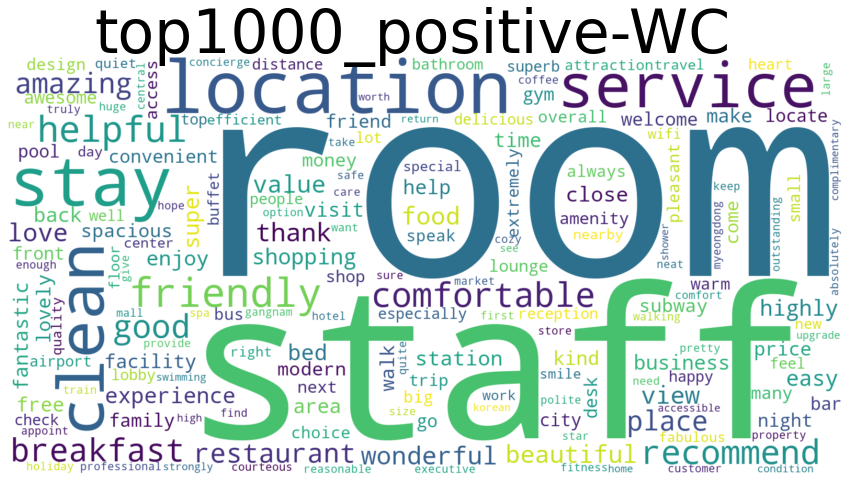

In [29]:
plot_wordcloud_top_n(data,1000,'clean_reviews Positive Sentiment Score','preprocessed_reviews','top1000_positive-WC')

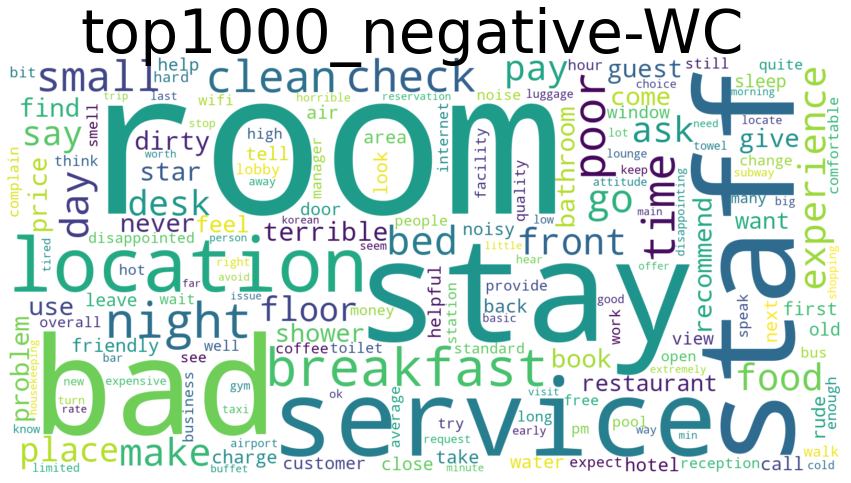

In [30]:
plot_wordcloud_top_n(data,1000,'clean_reviews Negative Sentiment Score','preprocessed_reviews','top1000_negative-WC')

In [31]:
## Dividing the DataFrame into Three

df_positive_sen = data[data['sentiment']=='Positive']
df_negative_sen = data[data['sentiment']=='Negative']
df_neutral_sen =data[data['sentiment']=='Neutral']

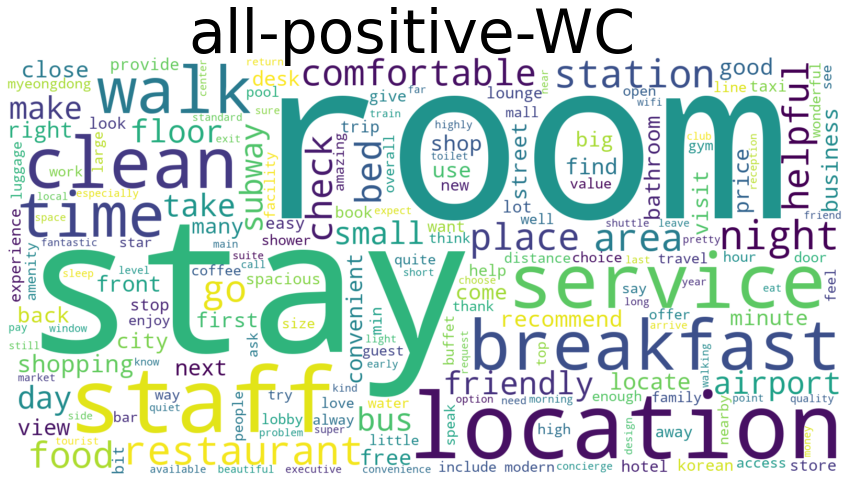

In [32]:
plot_wordcloud(df_positive_sen["preprocessed_reviews"],'all-positive-WC')

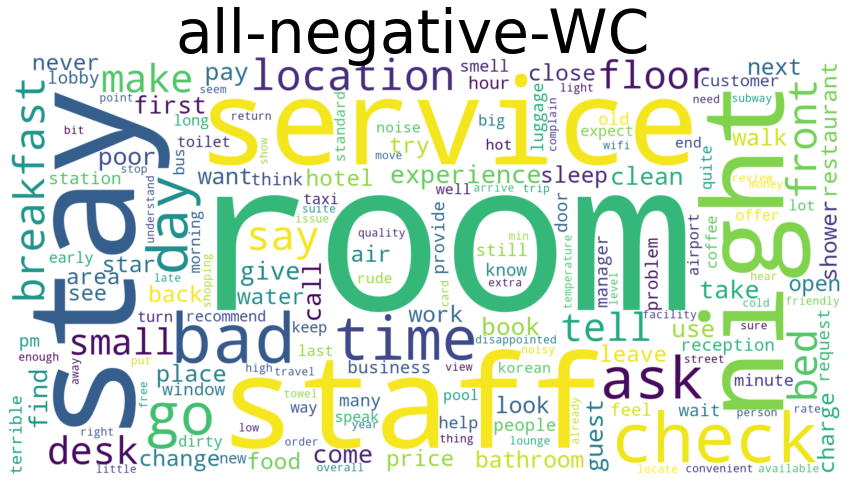

In [33]:
plot_wordcloud(df_negative_sen["preprocessed_reviews"],'all-negative-WC')

In [53]:
# saving the sentiment_scores for future use
sentiment_scores.to_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)

# SENTIMENT ANALYSIS by HOTEL

### Calculating number of Positive and Negative Reviews for each hotel

In [6]:
# Group the reviews by hotel name
hotel_groups = data.groupby('Hotel')

# Create a dictionary to store the number for each hotel
classified_reviews = {}

# Loop through each hotel group
for hotel_name, sentiment in hotel_groups:

    classified_reviews[hotel_name] = sentiment["sentiment"].value_counts()
    
# Convert the sentiment scores dictionary to a pandas DataFrame
df_classified_reviews = pd.DataFrame.from_dict(classified_reviews, orient='index')

df_classified_reviews.head()

,Positive,Neutral,Negative
9Brick_Hotel,18,2.0,NaN
Acube_Hotel,68,1.0,NaN
Aiden_by_Best_Western_Cheongdam,9,NaN,NaN
Aloft_Seoul_Gangnam,172,14.0,14.0
Aloft_Seoul_Myeongdong,524,9.0,9.0


In [49]:
df_classified_reviews.to_csv("Hotel_Num_Sentiments.csv")

In [9]:
df_classified_reviews.to_excel("TripAdvisor_Analysis1.xlsx",sheet_name='Hotel_Sentiment1')  

### Overall Hotel Sentiment

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Group the reviews by hotel name
hotel_groups = data.groupby('Hotel')

# Create a dictionary to store the sentiment scores for each hotel
sentiment_scores = {}

# Loop through each hotel group
for hotel_name, hotel_reviews in hotel_groups:
    # Concatenate all the reviews for the hotel into a single string
    hotel_text = ' '.join(hotel_reviews['clean_reviews'])
    
    # Calculate the sentiment score for the hotel
    
    sentiment_scores[hotel_name] = analyzer.polarity_scores(hotel_text)['compound']
    
# Convert the sentiment scores dictionary to a pandas DataFrame
df_sentiment = pd.DataFrame.from_dict(sentiment_scores, orient='index', columns=['compound_sentiment_score'])

# Sort the DataFrame by sentiment score
df_sentiment = df_sentiment.sort_values('compound_sentiment_score', ascending=False)

df_sentiment.head(10)

,compound_sentiment_score
InterContinental_Grand_Seoul_Parnas,1.0
Ibis_Styles_Ambassador_Seoul_Yongsan,1.0
Shilla_Stay_Gwanghwamun,1.0
Shilla_Stay_Guro,1.0
Sejong_Hotel,1.0
Hotel_Venue_G,1.0
Savoy_Hotel,1.0
Ibis_Ambassador_Seoul_Insadong,1.0
Ibis_Ambassador_Seoul_Myeongdong,1.0
Ibis_Styles_Ambassador_Seoul_Myeongdong,1.0


In [19]:
df_sentiment.sample(5)

,compound_sentiment_score
Center_Mark_Hotel_Seoul,1.0000
May_Place_Seoul_Dongdaemun,0.9999
Pharos_Hotel,1.0000
Hostel_Korea,1.0000
Hotel_The_Designers_Jongno,0.9999


In [23]:
# Applying the classifier to our data
df_sentiment["sentiment"] = df_sentiment["compound_sentiment_score"].apply(vader_classifier)

In [24]:
# saving the sentiment_scores for future use
df_sentiment.to_csv("Hotel_Sentiment_Score.csv")

In [25]:
df_sentiment.sample(5)

,compound_sentiment_score,sentiment
Shilla_Stay_Mapo,1.0000,Positive
Shilla_Stay_Samsung,0.9992,Positive
Fairfield_by_Marriott_Seoul,1.0000,Positive
L_Escape_Hotel,1.0000,Positive
Hotel_The_Designers_Jongno,0.9999,Positive
